In [1]:
#import important libray 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("D:\Data Sheet\\diabetes.csv") #for reading the data set
data.head() #For reading the First five values 
                 
        
        

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum() #Checking the missing values in the Dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here we find no dataset is missing in the dataset.

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

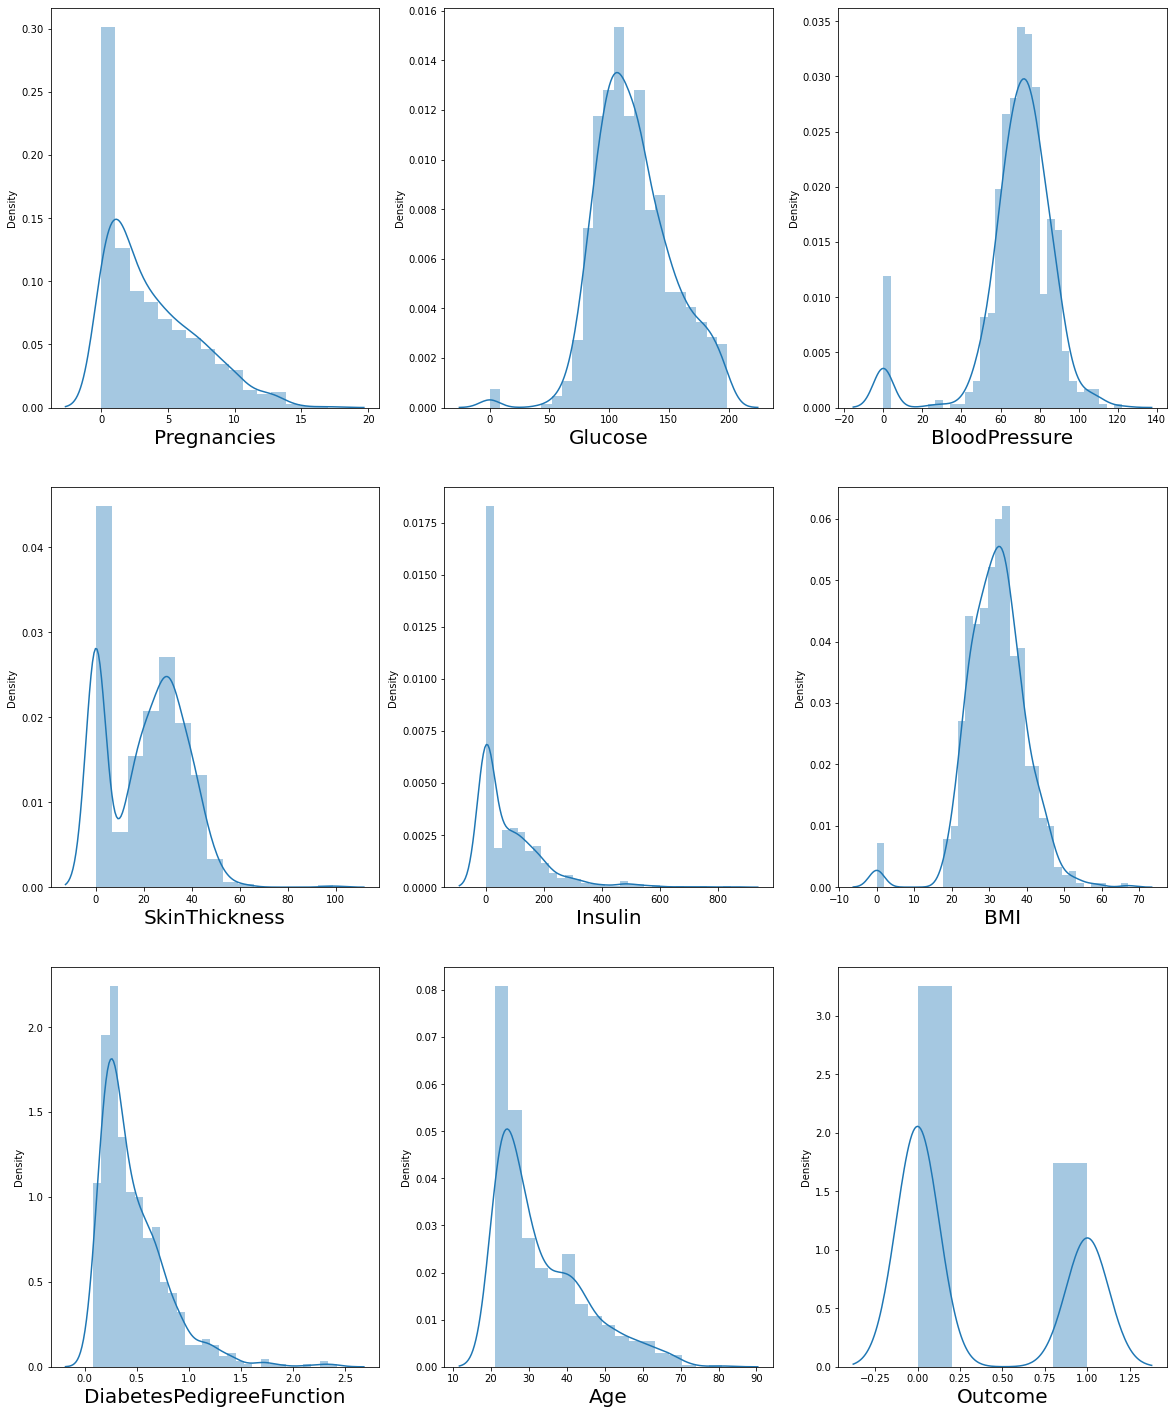

In [5]:
#let's see how the data set is distributed within tthe columns
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber<=9:  # As there 9 columns in the dataset
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel(salary,fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [6]:
#Replacing the zero values in the dataset with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

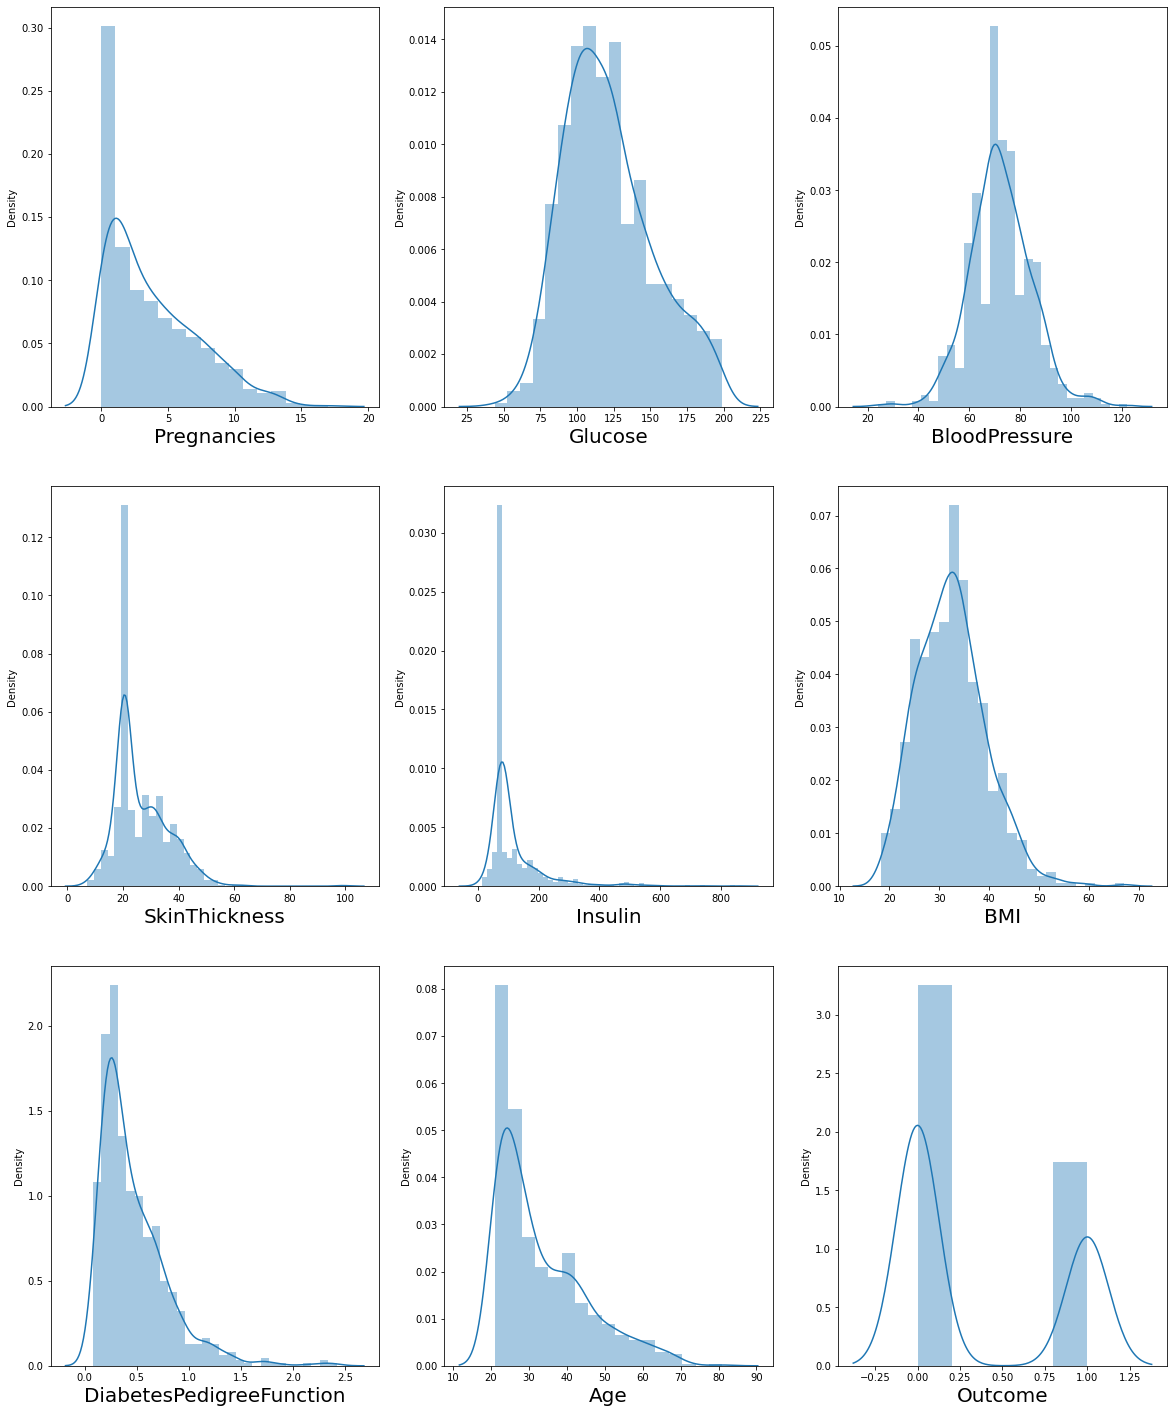

In [7]:
#let's see how the data set is distributed within tthe columns
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber<=9:  # As there 9 columns in the dataset
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel(salary,fontsize=20)
    plotnumber+=1
plt.show()

Here we can see the data is almost Normally distributed . There is no skeness present in the data set . 

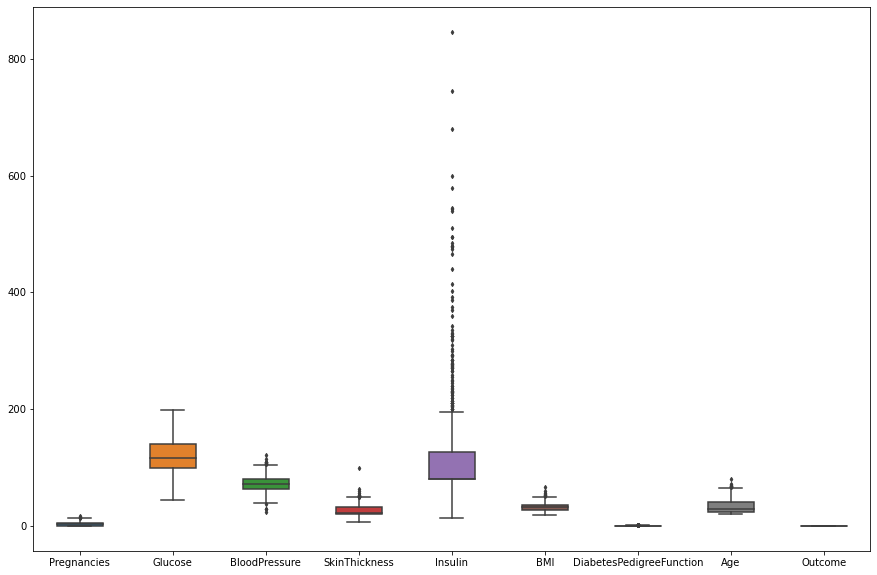

In [8]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width = 0.5 ,ax= ax, fliersize = 3)
plt.show()

Here we deal with the zero values but still outliers present in the data.Now deal with the outliers.
Box plot used to see the outliers present in dataset.The boxplot can be draw by the five number summary .  

In [9]:
#for removing the outliers present in the dataset 
q = data['Pregnancies'].quantile(0.98)
#we are going to remove the 2% data from the Pregnancies in columns
data_cleaned = data[data['Pregnancies']<q]
q = data['BMI'].quantile(0.99)
#we are going to remove the 1% of the dataset from the BMI in columns
data_cleaned = data[data['BMI']<q]
q = data['SkinThickness'].quantile(0.99)
#We are going to remove the 1% of the data from the skinthickness columns
data_cleaned = data[data['SkinThickness']<q]
q = data['Insulin'].quantile(0.98)
#we are going to remove 2% of the data from BMI
data_clean = data[data['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

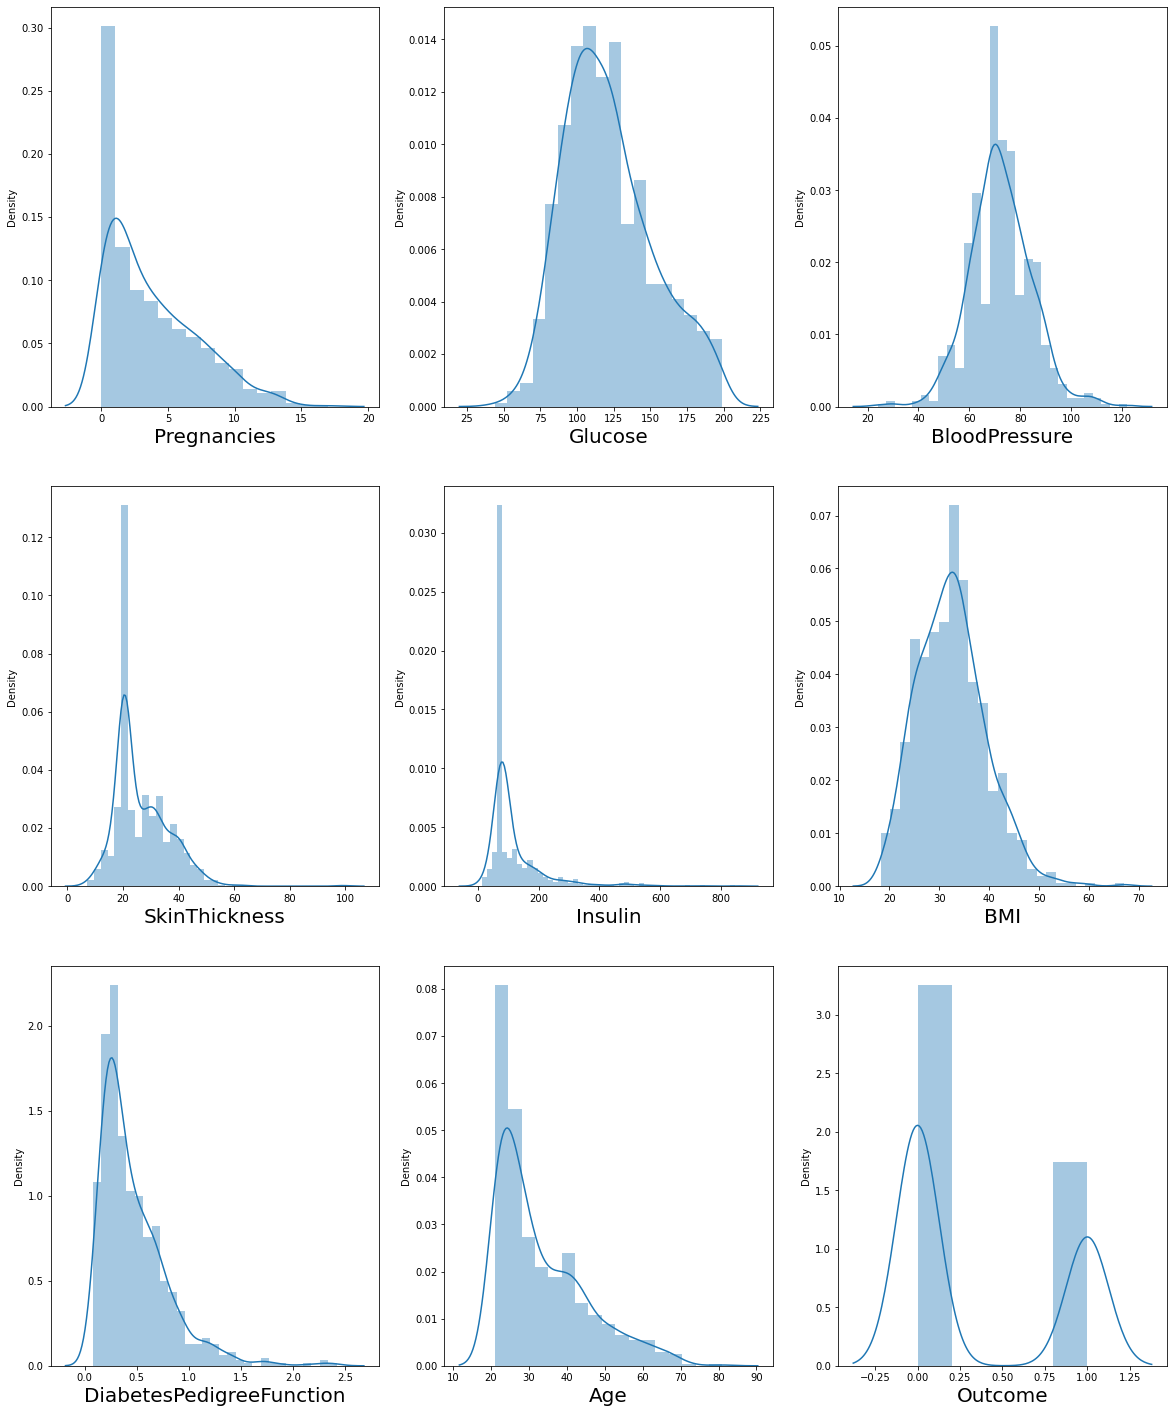

In [10]:
#let's see how the data set is distributed within tthe columns
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber<=9:  # As there 9 columns in the dataset
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel(salary,fontsize=20)
    plotnumber+=1
plt.show()

Here the dataset looks less skewed than above .We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [11]:
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\singh\anacond

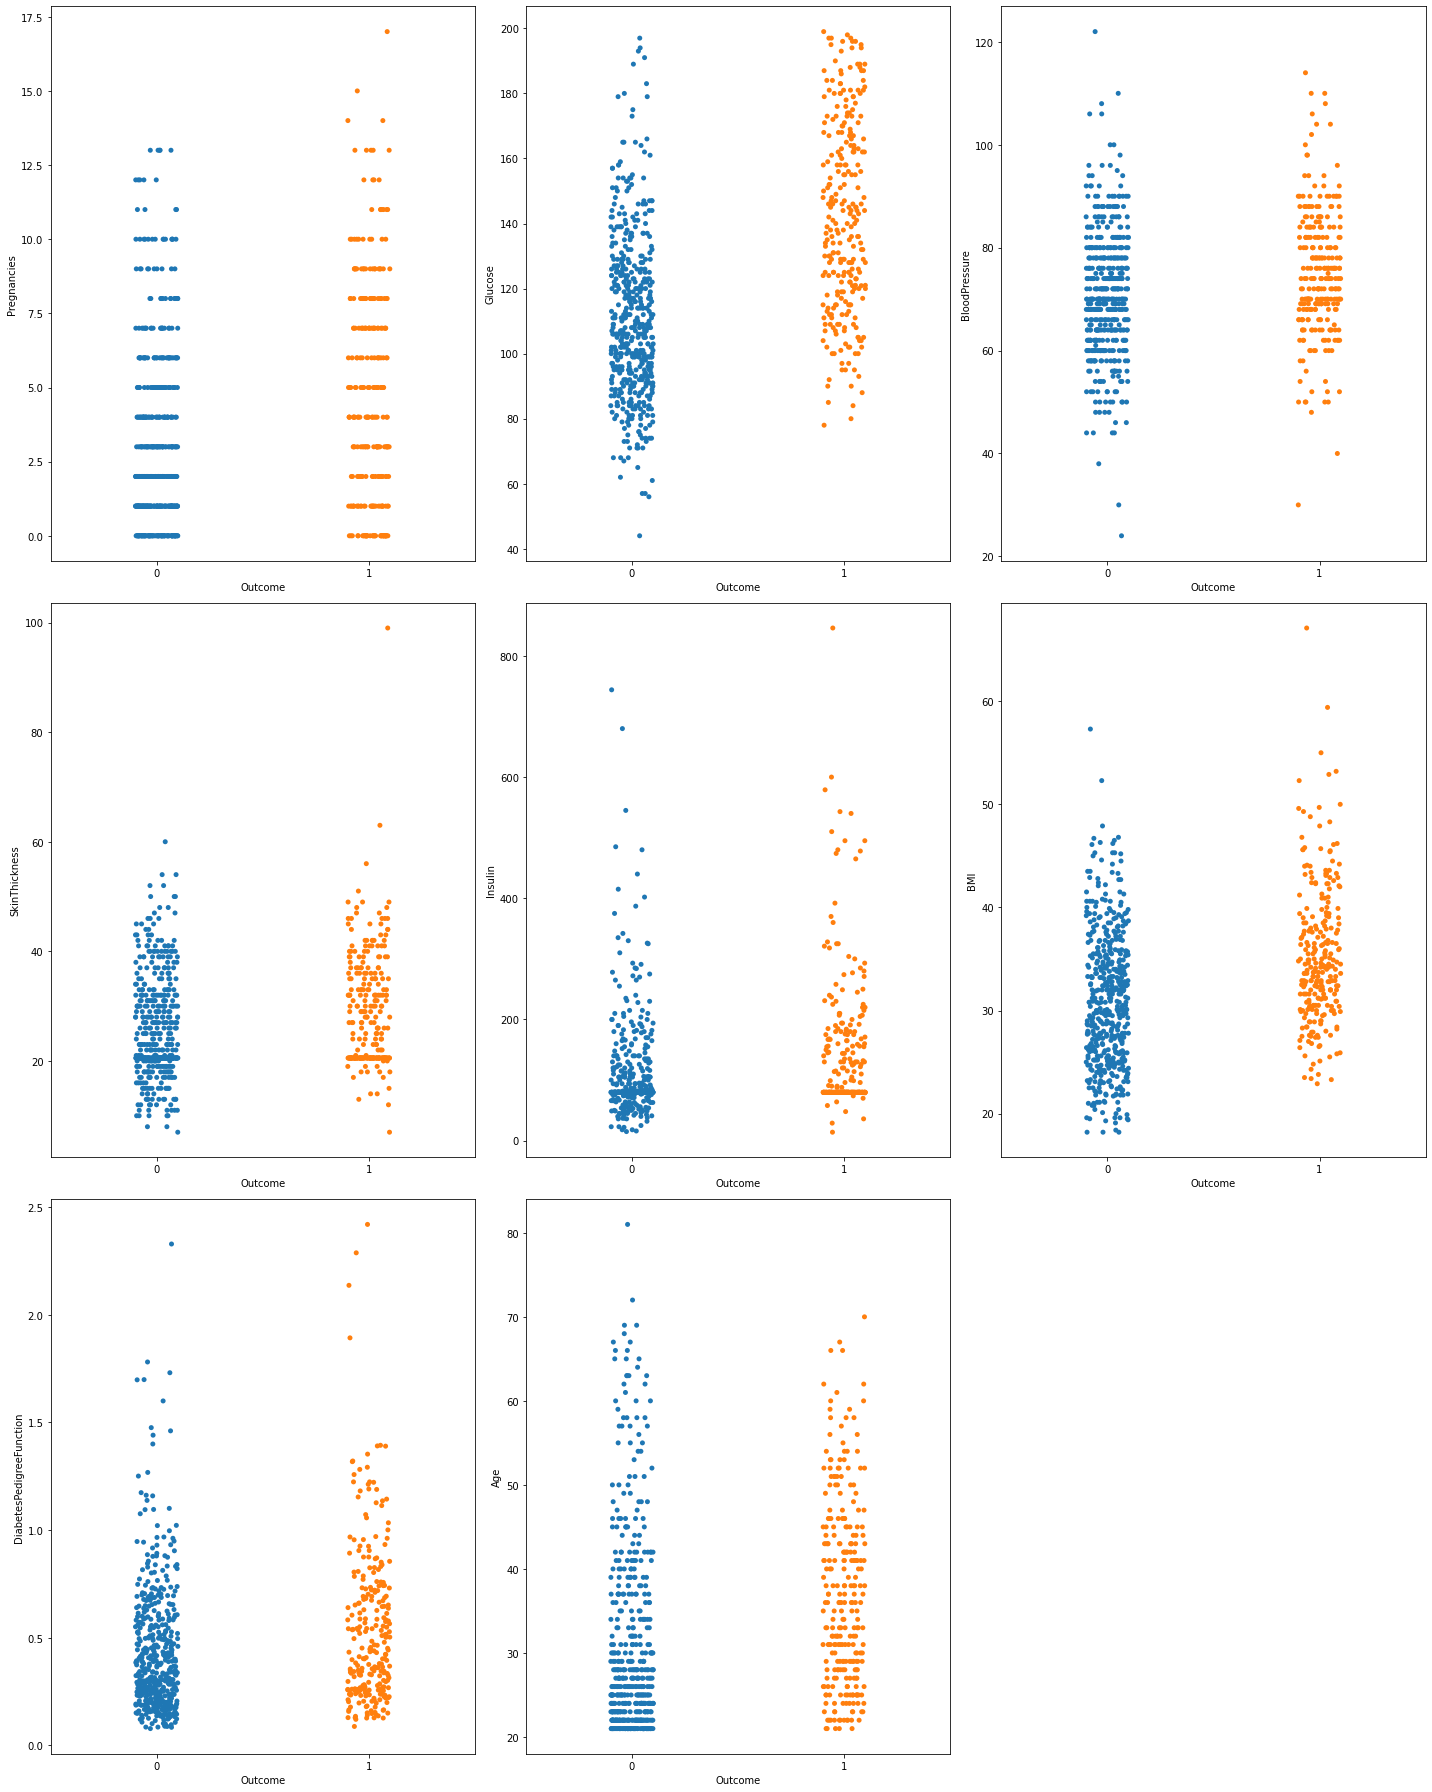

In [12]:
plt.figure(figsize = (20,25),facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

Here before processding in the dataset we should scale the dataset . 
StandardScaler removes the mean and scales each feature/variable to unit variance.

In [13]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

Here the dataset is complete scaled . Now for Multicolinearnity we are going to use VIF(Variance inflation Factor)

what is vif ?
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

In [15]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [17]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


Her the value of the vif is less than 5. Its means that data set is not multicollier within the dataset. 

Now we can go with the fiiting the our data into the our model. Before fitting the dataset into the model we should train and test the data. 

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state= 355)

Appling the Logistic Regression Algorithum . 

In [22]:
log_reg = LogisticRegression()
log_reg.fit(x_train ,y_train)

LogisticRegression()

Saving the model 

In [24]:
import pickle
#writing the different model file to file
with open('modelforprediction.sav','wb') as f:
    pickle.dump(log_reg,f)

with open ('standardscaler.sav','wb') as f:
    pickle.dump(scalar,f)
    


Let's check the how the model performance on test dataset. 

In [25]:
y_pred = log_reg.predict(x_test)

Here Checking the accuracy of the model. 

In [27]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

Confusion Matrix : A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [28]:
#confusion matrix 
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [29]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
true_negative = conf_mat[1][0]
false_negative = conf_mat[1][1]

Accuracy = total number of correct classification is divided by total number of classification .

In [31]:
#Breaking down the accuracy formula
Accuracy = (true_positive + true_negative) /  (true_positive + true_negative +false_positive +false_negative)
Accuracy


0.7395833333333334

Recall = from the total number of positive result how many of actual positive . 

In [33]:
#Breaking down the Recall formula 
Recall = true_positive/(true_positive + false_negative)
Recall

0.7586206896551724

Precision = From the all positive prediction How many of them actually positive . 

In [34]:
Precision = true_positive/(true_positive+ false_positive)
Precision

0.88

F1 Score = It is the hormonic mean of the precision and recall.

In [35]:
F1_score = 2*(Precision*Recall)/(Precision +Recall)
F1_score

0.8148148148148148

In [36]:
#Auc = Area Under the Curve 
auc = roc_auc_score(y_test,y_pred)
auc

0.7011940298507463

Roc Receiver Operator Characterstic 

Roc = IT is the graph showing the performance of a classification model at all classification thereshold. 

In [37]:
fpr,tpr,thersholds =roc_curve(y_test,y_pred)

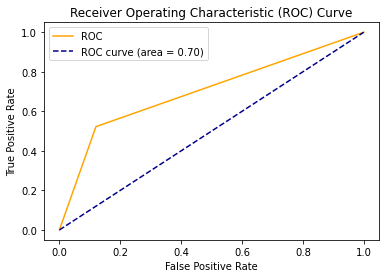

In [38]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# What is the use of RUC and AUC Curve in Logistic Regresssion ?

In the Classification model we can use many alogorithum to check which algo. is given best result,Suppose we Logistic regression and
SVM for the same dataset. Then how can we decided which is the best alogorithum for the particular dataset. From AUC and ROc we check
which algo. has more area for the data set then we select the particular Algorithum. 

# Advantage and Disadvantage of the Logistic Regression 

Advantage : 1) It is very easy and simple to implement.
            2) The Output is more informative than other Alogorithum.
            3) It Expresss the realtionship between dependent and indepdent variables.
            4) Very effective with the Linearly seperable data. 

# Disadvantage 

In [ ]:
1) Not effective with the data which is not linearly seperable. 
2) Multiclass classification is give better results with other algorithum.
3) It can o